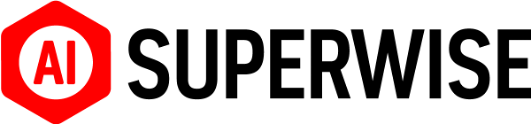

# **Example:  Applying a Superwise Guardrail to an Action on a Palantir Ontology**

This example shows how an Application using a Superwise Guardrail can can be leveraged with an action associated with a Palantir Foundry Ontology Action.  In this particular case we are using an Order Fufillment Ontology used to assign orders to process to individual employees.  Creating the Ontology and Assign Orders Action in Foundry can be accomplished by following the following Foundry tutorial:  https://learn.palantir.com/speedrun-your-first-e2e-workflow. Once that Assign Orders Action has been created, we will access it via the Foundry Python SDK:  https://pypi.org/project/foundry-platform-sdk/.  Then, we will create a Superwise Agent Application that can assign orders:  https://docs-swe.superwise.ai/docs/build-application and apply Superwise Guardrails to only Assign Orders but also prevent order assignment to a particular employee who is out sick:  https://docs-swe.superwise.ai/docs/guardrails-1.  Let's get started.

#**Create the Ontology and Assign Orders Action**

**Complete the tutorial here: https://learn.palantir.com/speedrun-your-first-e2e-workflow This will result in the Assign Orders Action being createds**

#**Access the Assign Orders Action via the Foundry Python SDK**

In [1]:
!pip install foundry-platform-sdk --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.7/983.7 kB 22.0 MB/s eta 0:00:00


In [2]:
from foundry.v1 import FoundryClient
import foundry
from pprint import pprint

In [3]:
BEARER_TOKEN = "<Your Foundry Bearer Token>"

In [4]:
foundry_client = FoundryClient(
    auth=foundry.UserTokenAuth(token=BEARER_TOKEN),
    hostname="https://superwise.usw-16.palantirfoundry.com",
)

In [47]:
#get the ontology_rid
try:
    ontology_rid = foundry_client.ontologies.Ontology.list().data[0].rid
    print("The Ontology rid:\n")
    #pprint(ontology_rid)
except foundry.PalantirRPCException as e:
    print("HTTP error when calling Ontology.list: %s\n" % e)

The Ontology rid:



In [6]:
# Get the Ontology "Object Type" and the "Object Type API Name"
# Refer to the tutorial

In [7]:
page_size = None
page_token = None

In [8]:
Action_Type_List = []
try:
    for action_type in foundry_client.ontologies.Ontology.ActionType.list(
        ontology_rid,
        page_size=page_size,
        page_token=page_token,
    ):
        #pprint(action_type)
        Action_Type_List.append(action_type)
except foundry.PalantirRPCException as e:
    print("HTTP error when calling ActionType.list: %s\n" % e)

In [9]:
display_name = '<the Assign Order name you gave to the Action in the Tutorial>'

In [68]:
for action_object in Action_Type_List:
  if action_object.display_name == display_name:
    #print(action_object.api_name)
    action = action_object.api_name
    #print(action_object.operations[0].object_type_api_name)
    object_type = action_object.operations[0].object_type_api_name
    #print(get_action_name())
    action_name = get_action_name()
    break

In [11]:
#Assign Order to an Employee for the Order identified in the tutorial
orderID = "<Your Order ID from the Tutorial>"

In [12]:
assignee = "employee1"

In [69]:
try:
    api_response = foundry_client.ontologies.Action.apply(
        ontology_rid,
        action,
        parameters={"assignee": assignee, action_name: orderID},
        #artifact_repository=artifact_repository,
        #options=options,
        #package_name=package_name,
    )
    print("The apply response:\n")
    pprint(api_response)
except foundry.PalantirRPCException as e:
    print("HTTP error when calling Action.apply: %s\n" % e)

The apply response:

ApplyActionResponse()


In [14]:
#check that order was assigned to the employee

In [15]:
order_by = None

In [16]:
list_of_ontology_objects = []
try:
    for ontology_object in foundry_client.ontologies.OntologyObject.list(
        ontology_rid,
        object_type,
        order_by=order_by,
        page_size=page_size,
        page_token=page_token,
        properties=None,
    ):
        #pprint(ontology_object)
        list_of_ontology_objects.append(ontology_object)
except foundry.PalantirRPCException as e:
    print("HTTP error when calling OntologyObject.list: %s\n" % e)

In [70]:
for ontology_object in list_of_ontology_objects:
  if ontology_object.properties.get('orderId') == orderID:
    print(ontology_object.properties.get('assignee'))
    break

employee1


In [18]:
def empoyee_assigned_to_fufill_order():
  list_of_ontology_objects = []
  try:
    for ontology_object in foundry_client.ontologies.OntologyObject.list(
        ontology_rid,
        object_type,
        order_by=order_by,
        page_size=page_size,
        page_token=page_token,
        properties=None,
    ):
        #pprint(ontology_object)
        list_of_ontology_objects.append(ontology_object)
  except foundry.PalantirRPCException as e:
    print("HTTP error when calling OntologyObject.list: %s\n" % e)

  for ontology_object in list_of_ontology_objects:
    if ontology_object.properties.get('orderId') == orderID:
      #print(ontology_object.properties.get('assignee'))
      employee_assigned_to_order = ontology_object.properties.get('assignee')
      break

  return employee_assigned_to_order

In [71]:
empoyee_assigned_to_fufill_order()

'employee1'

#**Create the Superwise Agent that interacts with the Ontology**

Note that this is a small subset of all you can do with Superwise.  
For complete Superwise capabilities visit: https://docs-swe.superwise.ai/

In [20]:
!pip install superwise-api --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 4.2 MB/s eta 0:00:00


In [21]:
import os
from superwise_api.superwise_client import SuperwiseClient

os.environ['SUPERWISE_CLIENT_ID'] = '<Your Superwise Client ID>'
os.environ['SUPERWISE_CLIENT_SECRET'] = '<Your Superwise Client Secret>'

sw = SuperwiseClient()

In [22]:
#Create your agent to receive an application request for moon distance
from superwise_api.models.application.application import AdvancedAgentConfig

app = sw.application.create(
    name="<Name your Superwise Agent",
    additional_config=AdvancedAgentConfig(tools=[]),
    llm_model=None
)

In [23]:
#Add your choice of LLM to the Agent
#Note there are many models and LLM services you can choose in Superwise
#Note that an application update like the below takes a few moments to deploy
from superwise_api.models.application.application import OpenAIModel, OpenAIModelVersion
from superwise_api.models.application.application import AdvancedAgentConfig

llm_model = OpenAIModel(version=OpenAIModelVersion.GPT_4, api_token="<your LLM key>")

app = sw.application.put(str(app.id),
                         additional_config=AdvancedAgentConfig(tools=[]),
                         llm_model=llm_model,
                         prompt=None,
                         name="<Name of your Superwise Agent>"
                        )

In [24]:
#test the connection to the agent
try:
    sw.application.test_model_connection(llm_model)
except Exception as e:
    print("Model test connection failed!")

print("Model test connection success!")

Model test connection success!


In [25]:
#get the app id and the app token
app_id = sw.application.get(name="<Name of your Superwise Agent>").items[0].id
app_token = str(sw.application.get(name="<Name of your Superwise Agent>").items[0].api_token)
print(app_id)
print(app_token)

cc51e20f-0a75-4d48-abd1-d00b486db571
e03e8e67-45a8-4c1f-b36b-c58056d67904


In [26]:
user_input = "What is the Capital of England?"

In [27]:
prompt = ""

In [28]:
import requests

In [29]:
def ask_application_via_api(app_id, user_input):
  endpoint_url = f"https://api.superwise.ai/v1/app-worker/{app_id}/v1/ask"

  payload = {
    "chat_history": [],
    "input": user_input,
    "prompt": prompt
  }

  headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "x-api-token": app_token
}

  resp = requests.post(endpoint_url, json=payload, headers=headers)
  app_response = resp.json()
  return app_response

In [72]:
#ask_application_via_api(app_id, user_input)

In [31]:
#add a prompt to direct the output to be only what is needed for the Assign Order Action for the All Orders Ontology
employee_assign_prompt = "You are an expert in assigning employees to fufill orders, return only the name of the person from the input. Just state name without any other text or punctuation"

In [32]:
app = sw.application.put(str(app.id),
                         additional_config=AdvancedAgentConfig(tools=[]),
                         llm_model=llm_model,
                         prompt=employee_assign_prompt,
                         name="<Name of your Superwise Agent>"
                        )

In [33]:
assign_employee_input = "Tell Mark to do this"

In [34]:
#test the agent with the updated prompt
def ask_application_via_api(app_id, user_input):
  endpoint_url = f"https://api.superwise.ai/v1/app-worker/{app_id}/v1/ask"

  payload = {
    "chat_history": [],
    "input": assign_employee_input,
    "prompt": employee_assign_prompt
  }

  headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "x-api-token": app_token
}

  resp = requests.post(endpoint_url, json=payload, headers=headers)
  app_response = resp.json()
  return app_response

swe_answer = ask_application_via_api(app_id, user_input)
print(swe_answer)

{'output': 'Attention: Your message has been blocked due to a guardrail violation. Please rephrase your message and try again.', 'metadata': {'guardrails_violations': [{'name': 'Do not assign Mark Stadtmueller', 'type': 'restricted_topics', 'message': 'Restricted topics present: ["Any assignment of \'Mark\' or \'Mark Stadtmueller\' or \'Stadtmueller\'"]'}], 'is_guardrails_violated': True}}


#**Create a Superwise Guardrail to prevent a particular employee to be assigned to the fufillment task**

In [35]:
#Add a Guardrail for a restricted topic
from superwise_api.models.application.application import ApplicationRestrictedTopicsGuard
from superwise_api.models.application.application import OpenAIModel

In [36]:
restricted_topics_guard = ApplicationRestrictedTopicsGuard(
    name="Do not assign Mark Stadtmueller",
    tag= "input",
    topics=["Any assignment of 'Mark' or 'Mark Stadtmueller' or 'Stadtmueller'"],
    model=OpenAIModel(version="<your llm name>", api_token="<your llm key>")
)

In [37]:
app = sw.application.put(str(app.id),
                         additional_config=AdvancedAgentConfig(tools=[]),
                         llm_model=llm_model,
                         prompt=employee_assign_prompt,
                         name="<Name of your Superwise Agent>",
                         guards=[restricted_topics_guard]
                        )

In [38]:
#test the Guardrail

In [39]:
assign_employee_input_2 = "Tell Stadtmueller to fufill the orders"

In [40]:
#test the agent with the updated guardrail
def ask_application_via_api(app_id, user_input):
  endpoint_url = f"https://api.superwise.ai/v1/app-worker/{app_id}/v1/ask"

  payload = {
    "chat_history": [],
    "input": assign_employee_input_2,
    "prompt": employee_assign_prompt
  }

  headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "x-api-token": app_token
}

  resp = requests.post(endpoint_url, json=payload, headers=headers)
  app_response = resp.json()
  return app_response

swe_answer = ask_application_via_api(app_id, user_input)
print(swe_answer)

{'output': 'Attention: Your message has been blocked due to a guardrail violation. Please rephrase your message and try again.', 'metadata': {'guardrails_violations': [{'name': 'Do not assign Mark Stadtmueller', 'type': 'restricted_topics', 'message': "Restricted topics present: ['Stadtmueller']"}], 'is_guardrails_violated': True}}


In [41]:
swe_answer['output']

'Attention: Your message has been blocked due to a guardrail violation. Please rephrase your message and try again.'

#**Test the full Superwise Guardrail to Assign Fufillment Action to Ontology Workflow**

**Retrieve the answer**

In [42]:
#test the agent with the updated guardrail
def assign_employee_with_guardrail(app_id, user_input):
  endpoint_url = f"https://api.superwise.ai/v1/app-worker/{app_id}/v1/ask"

  payload = {
    "chat_history": [],
    "input": user_input,
    "prompt": employee_assign_prompt
  }

  headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "x-api-token": app_token
}

  resp = requests.post(endpoint_url, json=payload, headers=headers)
  app_response = resp.json()

  if app_response['output'] == 'Attention: Your message has been blocked due to a guardrail violation. Please rephrase your message and try again.':
    print(app_response['output'])
    return empoyee_assigned_to_fufill_order()
  else:
    print(app_response['output'])

  assignee = app_response['output']

  try:
    api_response = foundry_client.ontologies.Action.apply(
        ontology_rid,
        action,
        parameters={"assignee": assignee, action_name: orderID},
        #artifact_repository=artifact_repository,
        #options=options,
        #package_name=package_name,
    )
    print("The apply response:\n")
    pprint(api_response)
  except foundry.PalantirRPCException as e:
    print("HTTP error when calling Action.apply: %s\n" % e)

  return empoyee_assigned_to_fufill_order()

In [43]:
assigning_employee_input_checked_by_guardrail = "assign employee3 to fufill order"

In [44]:
assign_employee_with_guardrail(app_id, assigning_employee_input_checked_by_guardrail)

employee3
The apply response:

ApplyActionResponse()


'employee3'

In [45]:
assigning_employee_input_checked_by_guardrail = "assign Mark Stadtmueller to fufill order"

In [46]:
assign_employee_with_guardrail(app_id, assigning_employee_input_checked_by_guardrail)

Attention: Your message has been blocked due to a guardrail violation. Please rephrase your message and try again.


'employee3'

# **This is just a basic example.  For a real application you would probably add another Superwise Guardrail (https://docs-swe.superwise.ai/docs/guardrails-1) to make sure that the topic is only about assigning employees to the fufillment action and provide more context fufillment actions and available employees. In addition you would use Superwise Agent Observability (https://docs-swe.superwise.ai/docs/observability) an Monitoring (https://docs-swe.superwise.ai/docs/monitoring) capabilities to track and ensure proper agent behavior.**